# Fiche n°5 : PFD et analyse d’une force de frottement

Cette fiche aborde l’étude de la chute d’une bille dans un liquide visqueux afin de proposer une expression à la force de frottement exercée par le fluide sur la bille. 

**Capacité numérique** : Utiliser un langage de programmation pour étudier la relation approchée entre la variation du vecteur vitesse d’un système modélisé par un point matériel entre deux instants voisins et la somme des forces appliquées sur celui-ci.


## 1. Tracé de la vitesse et analyse qualitative

A partir d’une exploitation préalable de la chronophotographie, les valeurs de la vitesse de la bille à chaque position sont entrées, puis la courbe de son évolution au cours du temps est tracée pour en faciliter l’analyse. 


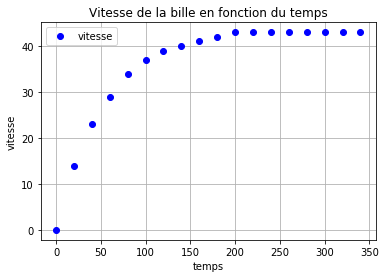

In [0]:
import numpy as np
import matplotlib.pyplot as plt

t = 20*np.arange(18) # on définit une liste de 18 entiers espacés de 20; 
                     # cela correspond à des valeurs du temps espacées 20ms
v=np.array([0,14,23,29,34,37,39,40,41,42,43,43,43,43,43,43,43,43])
plt.plot(t,v,'bo', label='vitesse')
plt.legend()
plt.grid()
plt.xlabel("temps")
plt.ylabel("vitesse")
plt.title("Vitesse de la bille en fonction du temps")
plt.show()

**Analyse** : il est possible de faire constater aux élèves l’existence d’une vitesse limite, vitesse qui correspond à la situation où les diverses forces qui s’exercent sur la bille se compensent. Le principe fondamental de la dynamique s’écrit :

<center>$m \frac{d\vec{v}}{dt}=m\vec{g} - m_f\vec{g} - \vec{F}_f$</center>

où $m_f\vec{g}$ est la poussée d’Archimède et $\vec{F}_f$ la force de frottement. En première, on peut dire que les variations du vecteur vitesse sont dues à ces trois forces.

Comme les deux premiers termes sont constants, les variations de l’accélération au cours du temps peuvent être attribuées à une variation de la force de frottement au cours du temps. Cela permet de proposer que la force de frottement dépende de la vitesse : $\vec{F}_f(v)$. D’autre part, la pente de la tangente fonction $v(t)$ a tendance à décroître au cours du temps, ce qui laisse penser que la norme de la force de frottement est une fonction croissante de la vitesse. A ce stade, il paraît difficile d’aller beaucoup plus loin. 


## 2. Modélisation de la force de frottement 

* Pour parvenir à proposer une forme analytique modèle pour cette force, il faut préciser la nature de la dépendance de la force avec la vitesse. Le tracé de $\lVert m\frac{d\vec{v}}{dt} \rVert$ en fonction de la vitesse est engagé.
* L’obtention d’une droite de pente négative permettrait de proposer une loi de type $\lVert \vec{F}_f(v) \rVert = kv$ (voire de relier ce résultat à l’expression proposée par Stokes dans le cas d’écoulements à faible nombre de Reynolds).
* L’obtention d’une branche de parabole permettrait de proposer une loi de type $\lVert \vec{F}_f(v) \rVert = kv^2$. 
* Le script utilisé pour calculer l’accélération est directement adapté des fiches précédentes. Pour tracer la norme de la variation de vitesse par unité de temps en fonction de la vitesse, il faut cependant penser à redimensionner la liste des valeurs de vitesse (c’est le sens de la commande v0=v[ 1:-1]). En effet, il faut prendre garde à bien faire correspondre les valeurs de vitesse et d’accélération calculées (c’est le sens de la commande v0=v[ 1:-1] qui enlève le premier terme et le dernier terme de la liste v).


[-0.01934091  0.83778409]


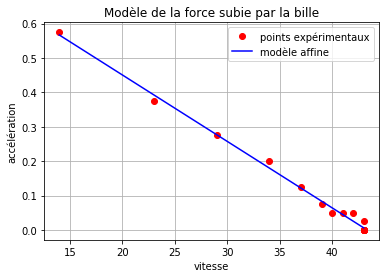

In [0]:
al=[] # on définit une liste vide
m=np.arange(len(t)-2) #Cf. scripts précédents
for i in m :
    a=(v[i+2]-v[i])/(t[i+2]-t[i])
    al.append(a)

v0=v[1:-1]                                        # on enlève le premier et le dernier terme et on garde tout le reste
mod=np.polyfit(v0,al,1)                           # on modélise al en fontion v0 par un fonction affine. 
model=mod[0]*v0+mod[1]                            # on définit la fonction correspondant à ce modèle
print(mod)                                        # on fait afficher les paramètres de la modélisation pour vérification des valeurs numériques
plt.plot(v0,al,'ro',label='points expérimentaux') # on fait tracer la liste des points exéprimentaux
plt.plot(v0,model,'b-',label='modèle affine')     # on fait tracer le modèle sur le même graphe
plt.legend()
plt.grid()
plt.xlabel("vitesse")
plt.ylabel("accélération")
plt.title("Modèle de la force subie par la bille")
plt.show()

**Conclusion** : La modélisation affine de la force (ici par unité de masse) semble pertinente, ce qui permet de proposer une modélisation de la force linéaire avec la vitesse (type formule de Stokes). Une utilisation du modèle de Stokes permet éventuellement de compléter cette activité par l’évaluation de la viscosité du fluide, à condition de connaître les caractéristiques de la bille (masse, rayon,…)